# Exercise 9

In [6]:
from sklearn.datasets import fetch_openml

# Load the dataset
mnist = fetch_openml('mnist_784')

# Accessing the data and target attributes
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]


Sem PCA


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
t0 = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Training time:", time.time()-t0)

Training time: 84.04946160316467


In [10]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

Com PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
clf2.fit(X_train_reduced, y_train)
print("Training time:", time.time()-t0)

Training time: 146.00213599205017


In [12]:
X_test_reduced = pca.transform(X_test)
y_pred = clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9488

In [13]:
#conclusoes: PCA aumentou o tempo de treinamento e diminuiu a acuracia do modelo,provavelmente por ter reduzido a dimensionalidade dos dados de forma muito agressiva e perdido informacoes importantes

# Exercicio 10

In [14]:
import numpy as np

In [16]:
import numpy as np

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'].iloc[idx]
y = mnist['target'].iloc[idx]

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

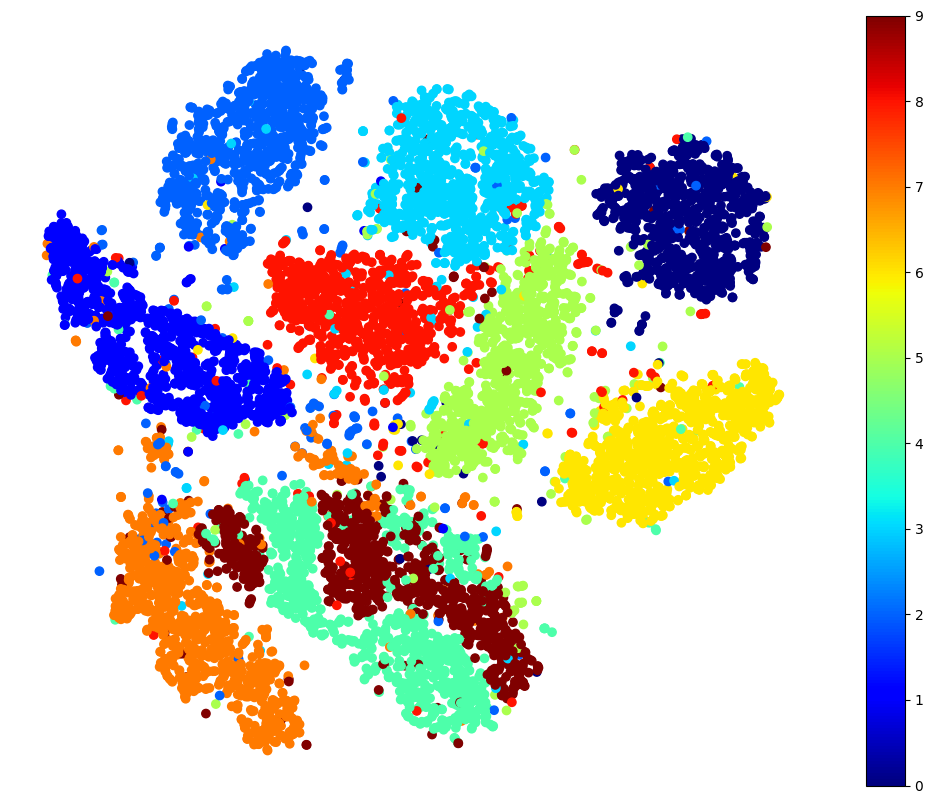

In [20]:
import matplotlib.pyplot as plt

# Converter a série categórica para uma sequência de números
y_numeric = y.cat.codes

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()